In [2]:
from sklearn import svm
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from scipy import sparse
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import networkx as nx
import obonet
from networkx.drawing.nx_agraph import graphviz_layout
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from pyensembl import EnsemblRelease
import statistics

In [10]:
beta_value = pd.read_csv('./../data/ENCODE/all_betavalues_2.txt', sep = '\t', engine = 'python')

In [11]:
print(beta_value.shape)

(452263, 311)


In [12]:
beta_value_all=beta_value

In [13]:
index_names1=beta_value[beta_value['V1']=='chrX'].index
index_names2=beta_value[beta_value['V1']=='chrY'].index
index_names=index_names1.append(index_names2)
beta_value.drop(index_names, inplace=True)
beta_value.reset_index(drop=True)

,V1,V2,ENCLB111ZZZ,ENCLB305LHQ,ENCLB687PBN,ENCLB197YSF,ENCLB999WAR,ENCLB313SPV,ENCLB487ATB,ENCLB218UOA,...,ENCLB940TVJ.1,ENCLB718RWF.1,ENCLB996SBO.1,ENCLB477JHA.1,ENCLB381OUG.1,ENCLB083WGG.1,ENCLB939LJO.1,ENCLB351URI.1,ENCLB338UKS.1,ENCLB434XDW.1
0,chr1,15865,0.533853,0.911201,0.932066,0.846492,0.903140,0.937620,0.908683,0.961792,...,0.901123,0.719371,0.907632,0.878690,0.952737,0.459562,0.810515,0.952409,0.949252,0.910222
1,chr1,18827,0.486352,0.924943,0.817333,0.895200,0.891048,0.851074,0.884471,0.764552,...,0.800752,0.857031,0.792725,0.541970,0.773263,0.819133,0.793721,0.851162,0.898025,0.846501
2,chr1,29407,0.491186,0.046116,0.052761,0.028891,0.055808,0.045702,0.027849,0.027846,...,0.022877,0.038029,0.051098,0.019764,0.028211,0.037812,0.051492,0.063532,0.041896,0.029380
3,chr1,29425,0.513524,0.271117,0.203111,0.044811,0.019538,0.027380,0.324091,0.950467,...,0.358720,0.038785,0.377645,0.472942,0.019741,0.030285,0.020391,0.027836,0.323020,0.341410
4,chr1,68849,0.338758,0.307786,0.255034,0.017283,0.019257,0.019276,0.280028,0.022418,...,0.320470,0.018656,0.403017,0.014918,0.017520,0.030571,0.021279,0.019558,0.399988,0.370081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441689,chr22,50783308,0.949892,0.016769,0.013970,0.014168,0.019071,0.010634,0.016095,0.020183,...,0.012182,0.010327,0.013200,0.006831,0.010106,0.011300,0.183219,0.011182,0.012613,0.013357
441690,chr22,50783615,0.772672,0.371554,0.449065,0.322744,0.780637,0.754708,0.365115,0.975126,...,0.296416,0.104084,0.964071,0.192831,0.952866,0.975976,0.427339,0.607650,0.463170,0.300729
441691,chr22,50783823,0.918715,0.525936,0.602532,0.440884,0.575065,0.555866,0.427756,0.952491,...,0.473031,0.637045,0.767001,0.150519,0.068540,0.556649,0.866524,0.657643,0.429031,0.392837
441692,chr22,50784091,0.875400,0.861236,0.956922,0.964656,0.909096,0.947947,0.971865,0.966841,...,0.966986,0.906590,0.970755,0.926603,0.467703,0.935997,0.049965,0.950031,0.944348,0.985276


In [3]:
tissue_ontology_tree=obonet.read_obo('./../annotation/bto.obo')

In [14]:
metadata_value=pd.read_csv('./../data/ENCODE/all_samplemetadata.txt', sep = '\t', engine = 'python')

In [15]:
print(metadata_value)

         Samples                                   Assay_type  \
0    ENCLB111ZZZ         Illumina - Methylation 450K BeadChip   
1    ENCLB305LHQ  Illumina Infinium Methylation EPIC BeadChip   
2    ENCLB687PBN  Illumina Infinium Methylation EPIC BeadChip   
3    ENCLB197YSF  Illumina Infinium Methylation EPIC BeadChip   
4    ENCLB544CRW           Illumina Infinium Omni5Exome-4 Kit   
..           ...                                          ...   
209  ENCLB939LJO  Illumina Infinium Methylation EPIC BeadChip   
210  ENCLB351URI  Illumina Infinium Methylation EPIC BeadChip   
211  ENCLB107CWC           Illumina Infinium Omni5Exome-4 Kit   
212  ENCLB338UKS  Illumina Infinium Methylation EPIC BeadChip   
213  ENCLB434XDW  Illumina Infinium Methylation EPIC BeadChip   

                             Source   Source_type       Series Database  \
0                             MCF-7     cell line  ENCSR000AAY   ENCODE   
1                     thyroid gland        tissue  ENCSR001NCN   ENCO

In [17]:
len(set(metadata_value['Source']))

86

In [8]:
disease_table=pd.read_csv('./../annotation/GEO_metadata_test1.txt', sep = '\t', engine = 'python')

In [16]:
# Get all features in the form of 'chr position'
empty=[' ']*len(beta_value)
feature=np.char.array(beta_value['V1'])+np.char.array(empty)
feature=np.char.array(feature)+np.char.array(list(map(str, beta_value['V2'])))

In [378]:
#Get samples with both methylation data and metadata annotation
beta_samples=list(beta_value.columns)[2:]
metadata_samples=metadata_value['sample_id']
overlap=set(beta_samples).intersection(metadata_samples)
disease_term=metadata_value['disease_name']
tissue_term=metadata_value['tissue_name']

In [379]:
#Remove overlapping samples
index_to_delete=['GSM3813550', 'GSM3813542', 'GSM3813555', 'GSM3813541', 'GSM3813540']
for i in index_to_delete:
    overlap.remove(i)

In [381]:
X=beta_value[overlap]

In [380]:
normal_sample=[metadata_value['sample_id'][i] for i in range(0,len(disease_term)) if ((disease_term[i]=='normal') and (tissue_term[i]!='embryonic stem cell line' and tissue_term[i]!='MDA-MB-436 cell'))]
normal_sample_index=[i for i in range(0,len(disease_term)) if ((disease_term[i]=='normal') and (tissue_term[i]!='embryonic stem cell line' and tissue_term[i]!='MDA-MB-436 cell'))]
normal_sample_value=metadata_value['tissue_name'][normal_sample_index]

In [224]:
name_to_id = { id_:data.get('name') for id_, data in tissue_ontology_tree.nodes(data=True)}

In [238]:
# Get the correponding nodes of all metadata (selected_nodes) and all the nodes that connect them into a DAG (completed node)
def create_subgraph(tissue_ontology_tree,normal_sample_value):
    id_to_name = { data.get('name'):id_ for id_, data in tissue_ontology_tree.nodes(data=True)}
    selected_nodes=list(id_to_name[x] for x in list(set(normal_sample_value)))
    completed_nodes=[]
    for node_element in selected_nodes:
        print(node_element)
        completed_nodes=completed_nodes+list(nx.ancestors(tissue_ontology_tree,node_element))
    completed_nodes=completed_nodes+selected_nodes
    return(completed_nodes)

In [239]:
completed_nodes=create_subgraph(tissue_ontology_tree,normal_sample_value)

BTO:0000876
BTO:0005871
BTO:0000553
BTO:0001025
BTO:0000047
BTO:0004053
BTO:0000759
BTO:0003435


In [240]:
# Create subgraph containing all metadata values
tissue_subgraph=tissue_ontology_tree.subgraph(completed_nodes)
#plt.title('draw_networkx')
#pos=graphviz_layout(tissue_subgraph, prog='dot')
#nx.draw(tissue_subgraph, pos, with_labels=True, arrows=True)


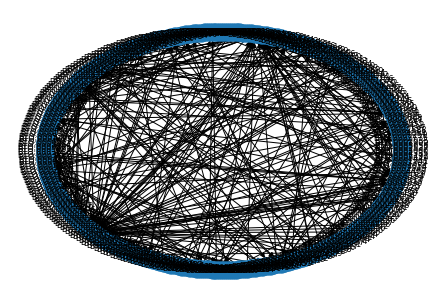

In [241]:
nx.draw(tissue_subgraph,pos=nx.circular_layout(tissue_subgraph, scale=5),with_labels=True,font_size=8)

In [243]:
print(nx.is_weakly_connected(tissue_subgraph))

False


In [226]:
print(tissue_subgraph.edges())
print(tissue_subgraph.nodes())
print(list(name_to_id[i] for i in list(tissue_subgraph.nodes())))

[('BTO:0000759', 'BTO:0000345'), ('BTO:0000759', 'BTO:0001491'), ('BTO:0004053', 'BTO:0000089'), ('BTO:0004053', 'BTO:0001415'), ('BTO:0003435', 'BTO:0000782'), ('BTO:0005871', 'BTO:0000782'), ('BTO:0000876', 'BTO:0000751'), ('BTO:0000876', 'BTO:0001433'), ('BTO:0000047', 'BTO:0001488'), ('BTO:0000047', 'BTO:0001491'), ('BTO:0000345', 'BTO:0001488'), ('BTO:0001433', 'BTO:0000878'), ('BTO:0001025', 'BTO:0000878'), ('BTO:0001025', 'BTO:0000553'), ('BTO:0000553', 'BTO:0000089')]
['BTO:0000759', 'BTO:0001415', 'BTO:0004053', 'BTO:0003435', 'BTO:0000751', 'BTO:0001488', 'BTO:0001491', 'BTO:0005871', 'BTO:0000878', 'BTO:0000876', 'BTO:0000047', 'BTO:0000782', 'BTO:0000089', 'BTO:0000345', 'BTO:0001433', 'BTO:0001025', 'BTO:0000553']
['liver', 'umbilical cord', 'umbilical cord blood', 'memory T-lymphocyte', 'leukocyte', 'endocrine gland', 'viscus', 'naive T-lymphocyte', 'mononuclear cell', 'monocyte', 'adrenal gland', 'T-lymphocyte', 'blood', 'digestive gland', 'mononuclear phagocyte', 'perip

In [250]:
# Create binary classifier Y values 
def get_indicator_matrix(node):
    id_node=id_to_name[node]
    ancestor_nodes=[i for i in normal_sample_index if id_to_name[metadata_value['tissue_name'][i]] in nx.descendants(tissue_ontology_tree, id_node)]
    print(ancestor_nodes)
    positive_sample_index=[i for i in normal_sample_index if id_to_name[metadata_value['tissue_name'][i]] not in nx.descendants(tissue_ontology_tree, id_node) and (id_to_name[metadata_value['tissue_name'][i]] in nx.ancestors(tissue_ontology_tree, id_node) or id_to_name[metadata_value['tissue_name'][i]]==id_node)]
    y_matrix=np.zeros(((len(metadata_value['tissue_name'])), 1))
    y_matrix[positive_sample_index]=1
    samples_keep=list(set(normal_sample_index)-set(ancestor_nodes))
    y_matrix_sample=y_matrix[samples_keep]
    return(y_matrix_sample,ancestor_nodes,positive_sample_index)

In [252]:
[x,y,z]=get_indicator_matrix('peripheral blood')

[]


In [319]:
data = EnsemblRelease(77)

monocyte
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[4.]
[2.]
[6.]
Accuracy: 0.9937106918238994
[['LINC00445'], ['ANO4'], [], ['GNAL'], ['APOC4-APOC2'], ['ZNF827'], ['ESPNL'], ['MAD1L1'], ['MYO19', 'PIGW'], ['CDHR2'], [], ['ZNF765'], [], ['CCNF'], ['SNHG14'], ['STX10'], ['DNAH2'], ['AP5Z1', 'FOXK1'], ['FAM181A'], ['NXT1', 'RP3-322G13.7']]
[['ENSG00000236036'], ['ENSG00000151572'], [], ['ENSG00000141404'], ['ENSG00000224916'], ['ENSG00000151612'], ['ENSG00000144488'], ['ENSG00000002822'], ['ENSG00000277161', 'ENSG00000278259'], ['ENSG00000074276'], [], ['ENSG00000196417'], [], ['ENSG00000162063'], ['ENSG00000224078'], ['ENSG00000104915'], ['ENSG00000183914'], ['ENSG00000164916', 'ENSG00000242802'], ['ENSG00000140067'], ['ENSG00000132661', 'ENSG00000234832']]


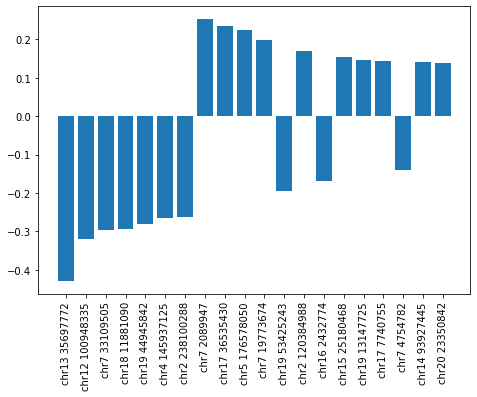

AUC:1.0
naive T-lymphocyte
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[3.]
[1.]
[4.]
Accuracy: 0.9937106918238994
[['DNAH2'], [], ['MAD1L1'], [], ['FZR1'], ['ANO4'], [], ['PRKAR1B'], ['ANKS1B'], ['IGFL1'], [], ['MIR517A'], [], ['RGL2'], ['CCDC57'], [], ['CDHR2'], ['STX10'], ['LHX1'], ['PCBP4', 'RP11-155D18.12']]
[['ENSG00000183914'], [], ['ENSG00000002822'], [], ['ENSG00000105325'], ['ENSG00000151572'], [], ['ENSG00000188191'], ['ENSG00000185046'], ['ENSG00000188293'], [], ['ENSG00000207734'], [], ['ENSG00000237441'], ['ENSG00000176155'], [], ['ENSG00000074276'], ['ENSG00000104915'], ['ENSG00000273706'], ['ENSG00000090097', 'ENSG00000272762']]


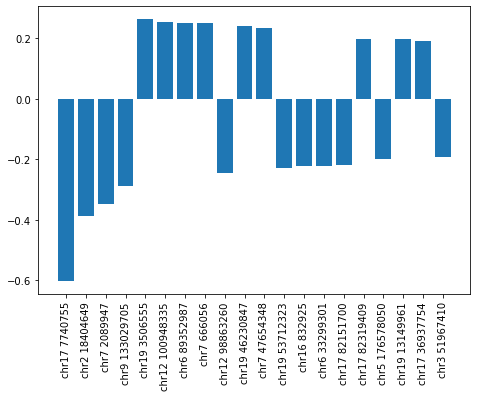

AUC:0.9936708860759493
peripheral blood
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[160.]
[70.]
[230.]
Accuracy: 0.9874213836477987
[['DNAH2'], [], ['FZR1'], ['LINC00445'], ['STX10'], ['PRKAR1B'], [], ['STX10'], ['GYPC'], ['CTD-2525I3.2'], ['MAD1L1'], [], ['CCDC57'], ['ANKS1B'], ['CARKD'], [], [], ['TAP2'], [], ['MIR517A']]
[['ENSG00000183914'], [], ['ENSG00000105325'], ['ENSG00000236036'], ['ENSG00000104915'], ['ENSG00000188191'], [], ['ENSG00000104915'], ['ENSG00000136732'], ['ENSG00000267927'], ['ENSG00000002822'], [], ['ENSG00000176155'], ['ENSG00000185046'], ['ENSG00000213995'], [], [], ['ENSG00000204267', 'ENSG00000250264'], [], ['ENSG00000207734']]


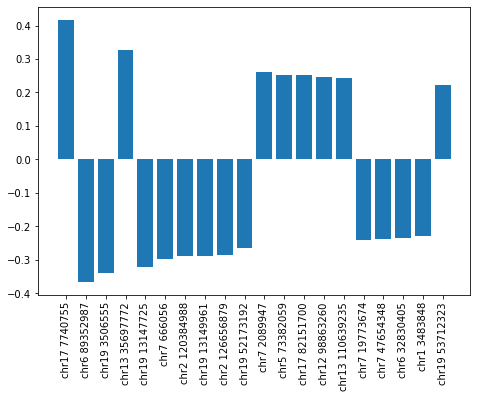

AUC:0.9993579454253612
peripheral blood mononuclear cell
[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
(446, 1)
(446, 441683)
687
chr1 2985313
[132.]
[64.]
[196.]
Accuracy: 0.972972972972973
[['FZD7'], ['NREP'], [], ['NRD1'], ['DPP10'], ['CTB-35F21.4', 'NRG2'], ['CTBP1-AS2'], ['DDIT4L', 'RP11-15B17.1'], ['CSPG5'], ['DLG5'], ['SMG6'], ['ERICH1-AS1'], ['PARK2'], [], ['LINC00092'], ['SMARCAD1'], ['ARHGEF7'], [], [], ['TRAPPC12']]
[['ENSG00000155760'], ['ENSG00000134986'], [], ['ENSG00000078618'], ['ENSG00000175497'], ['ENSG00000158458', 'ENSG00000250692'], ['ENSG00000196810'], ['ENSG00000145358', 'ENSG00000245322'], ['ENSG00000114646'], ['ENSG00000151208'], ['ENSG00000070366'], ['ENSG00000237647'], ['ENSG00000185345'], [], ['ENSG00000225194'], ['ENSG00000163104'], ['ENSG00000102606'], [], [], ['ENSG00000171853']]


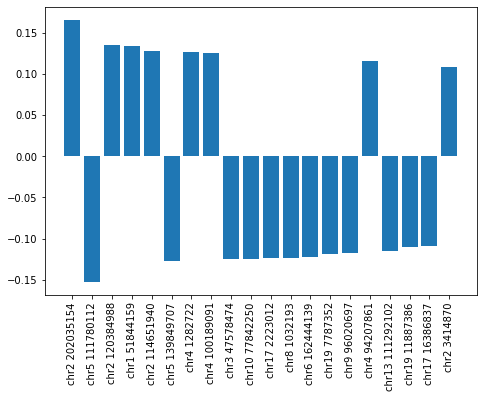

AUC:0.9994419642857143
adrenal gland
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[8.]
[4.]
[12.]
Accuracy: 1.0
[['UQCC1'], ['CYB5B', 'RP11-343C2.10'], ['FCHO1'], ['CTC-756D1.2'], [], ['GCK'], [], ['METTL6'], ['IKBIP'], [], [], [], ['PRKCE'], ['LBX2-AS1'], ['LSM3', 'XPC'], ['LINC01470'], ['PIP5K1C'], [], [], ['TSFM']]
[['ENSG00000101019'], ['ENSG00000103018', 'ENSG00000261527'], ['ENSG00000130475'], ['ENSG00000253390'], [], ['ENSG00000106633'], [], ['ENSG00000206562'], ['ENSG00000166130'], [], [], [], ['ENSG00000171132'], ['ENSG00000257702'], ['ENSG00000154767', 'ENSG00000170860'], ['ENSG00000249484'], ['ENSG00000186111'], [], [], ['ENSG00000123297']]


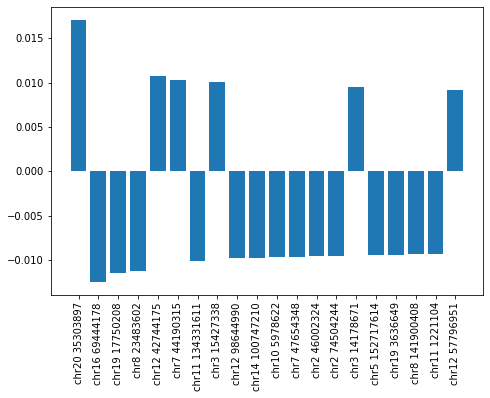

AUC:1.0
umbilical cord blood
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[128.]
[68.]
[196.]
Accuracy: 0.9937106918238994
[['DPP10'], ['FZD7'], ['NREP'], ['NRD1'], [], [], ['ASAP2'], ['CTBP1-AS2'], ['SMG6'], ['PARK2'], ['STX10'], ['SKAP1'], ['DLG5'], ['CSPG5'], ['DDIT4L', 'RP11-15B17.1'], [], ['LINC00092'], ['ZNRD1', 'ZNRD1-AS1'], ['RNF207', 'RPL22'], ['C19orf12']]
[['ENSG00000175497'], ['ENSG00000155760'], ['ENSG00000134986'], ['ENSG00000078618'], [], [], ['ENSG00000151693'], ['ENSG00000196810'], ['ENSG00000070366'], ['ENSG00000185345'], ['ENSG00000104915'], ['ENSG00000141293'], ['ENSG00000151208'], ['ENSG00000114646'], ['ENSG00000145358', 'ENSG00000245322'], [], ['ENSG00000225194'], ['ENSG00000066379', 'ENSG00000204623'], ['ENSG00000116251', 'ENSG00000158286'], ['ENSG00000131943']]


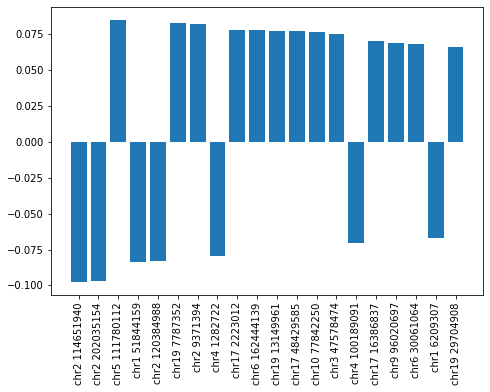

AUC:0.9930510665804784
liver
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[14.]
[12.]
[26.]
Accuracy: 0.9937106918238994
[[], ['STK32C'], [], [], [], ['CACYBPP3'], [], [], ['SYT7'], [], ['RP11-51B23.3'], [], [], ['INTS1'], ['CEP85L'], ['ADAMTS18'], ['GJB6'], [], ['NFIA'], []]
[[], ['ENSG00000165752'], [], [], [], ['ENSG00000219188'], [], [], ['ENSG00000011347'], [], ['ENSG00000254847'], [], [], ['ENSG00000164880'], ['ENSG00000111860'], ['ENSG00000140873'], ['ENSG00000121742'], [], ['ENSG00000162599'], []]


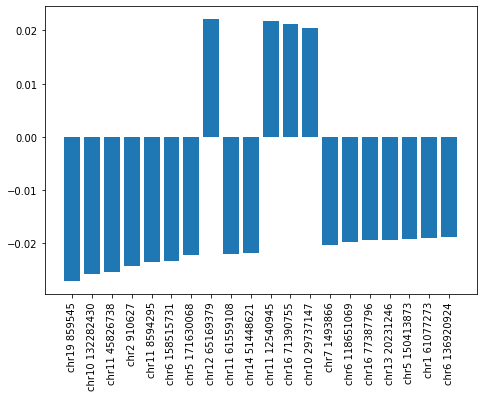

AUC:1.0
memory T-lymphocyte
[]
(480, 1)
(480, 441683)
4083
chr1 1462648
[4.]
[2.]
[6.]
Accuracy: 0.9811320754716981
[[], [], ['RASA3'], ['C5orf66'], [], [], [], ['RGL2'], [], ['NSA2'], [], [], ['CTC-270D5.1', 'PCDHB1'], [], [], ['CCDC154'], ['CALML3', 'CALML3-AS1'], [], [], ['TRIO']]
[[], [], ['ENSG00000185989'], ['ENSG00000224186'], [], [], [], ['ENSG00000237441'], [], ['ENSG00000164346'], [], [], ['ENSG00000171815', 'ENSG00000279047'], [], [], ['ENSG00000197599'], ['ENSG00000178363', 'ENSG00000205488'], [], [], ['ENSG00000038382']]


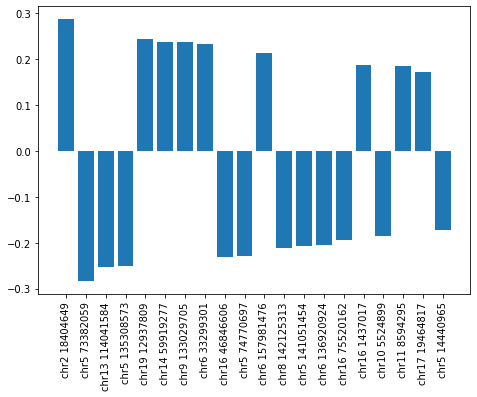

AUC:0.9777070063694268


In [392]:
all_genes=dict()
for i in set(normal_sample_value):
    print(i)
    [y_matrix_single, ancestor_node, positive_sample]=get_indicator_matrix(i)
    print(y_matrix_single.shape)
    x_matrix_single=beta_value.iloc[:,list(set(normal_sample_index)-set(ancestor_node))]
    value_X=np.transpose(np.array(x_matrix_single))
    print(value_X.shape)
    sel = VarianceThreshold(threshold=(0.09))
    filtered_X=sel.fit_transform(value_X)
    mask = sel.get_support(indices=True)
    print(len(mask))
    filtered_labels=list(feature[mask])
    print(filtered_labels[1])
    X_train, X_test, y_train, y_test = train_test_split(filtered_X, y_matrix_single, test_size=0.33, random_state=42)
    print(sum(y_train))
    print(sum(y_test))
    print(sum(y_matrix_single))
    clf = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    coefficients=list(clf.coef_[0,:])
    coeffdict={coefficients[i]:filtered_labels[i] for i in range(0, len(coefficients))}
    coordinate_coeffdict={coefficients[i]:mask[i] for i in range(0, len(coefficients))}
    sorted_coeffs=sorted(coefficients, key=abs, reverse=True)
    CpGcoord20=[coordinate_coeffdict[key] for key in sorted_coeffs[0:20]]
    gene_names=[]
    gene_ids=[]
    for j in CpGcoord20:
        chromo=beta_value['V1'][j].split('chr')[1]
        CpGposition=beta_value['V2'][j]
        gene_names.append(data.gene_names_at_locus(contig=chromo, position=int(CpGposition)))
        gene_ids.append(data.gene_ids_at_locus(contig=chromo, position=int(CpGposition)))
    all_genes.update({i:gene_names})
    print(gene_names)
    print(gene_ids)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar([coeffdict[key] for key in sorted_coeffs[0:20]],sorted_coeffs[0:20])
    plt.xticks(rotation=90)
    plt.show()
    #y_prob=clf.predict_proba(X_test)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    print('AUC:'+str(auc(fpr,tpr)))
    # Compute ROC curve and ROC area for each class
    #n_classes = y_matrix_single.shape[1]
    #fpr = dict()
    #tpr = dict()
    #roc_auc = dict()
    #for i in range(n_classes):
        #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        #roc_auc[i] = auc(fpr[i], tpr[i])
#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

In [393]:
top20rankgene=pd.DataFrame(all_genes)

In [394]:
print(top20rankgene)
top20rankgene.to_csv(path_or_buf='./../annotation/top20gene.csv',index=False)

                monocyte       naive T-lymphocyte peripheral blood  \
0            [LINC00445]                  [DNAH2]          [DNAH2]   
1                 [ANO4]                       []               []   
2                     []                 [MAD1L1]           [FZR1]   
3                 [GNAL]                       []      [LINC00445]   
4          [APOC4-APOC2]                   [FZR1]          [STX10]   
5               [ZNF827]                   [ANO4]        [PRKAR1B]   
6                [ESPNL]                       []               []   
7               [MAD1L1]                [PRKAR1B]          [STX10]   
8          [MYO19, PIGW]                 [ANKS1B]           [GYPC]   
9                [CDHR2]                  [IGFL1]   [CTD-2525I3.2]   
10                    []                       []         [MAD1L1]   
11              [ZNF765]                [MIR517A]               []   
12                    []                       []         [CCDC57]   
13                [C

In [169]:
print(filtered_X.shape)
check=X.isna()
columns=check.any()
columns_with_na=X.columns[columns].tolist()
print(columns_with_na)

(480, 4166)
[]


In [74]:
metadata_index=[]
metadata_index_value=[]
for i in range(0,len(metadata_value['sample_id'])):
    if (metadata_value['sample_id'][i] in overlap) & (metadata_value['sample_id'][i] not in metadata_index_value):
        metadata_index_value.append(metadata_value['sample_id'][i])
        metadata_index.append(i)
Y=metadata_value['term_name'][set(metadata_index)]

In [395]:
# create X and Y for normal samples
value_X=np.transpose(np.array(beta_value.iloc[:,normal_sample_index]))
Y=list(tissue_term[normal_sample_index])

In [396]:
print(filtered_X.shape)
print(Y_encoded.shape)

(480, 4083)
(480,)


In [398]:
# establish X and Y for random forest classifier
lb = preprocessing.LabelBinarizer()
value_Y=lb.fit_transform(Y)
label_encoder = preprocessing.LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(filtered_X, Y_encoded, test_size=0.3, random_state=42)

In [397]:
sel = VarianceThreshold(threshold=(0.1))
filtered_X=sel.fit_transform(value_X)
mask = sel.get_support(indices=True)
print(len(mask))
filtered_labels=feature[mask]
X_train, X_test, y_train, y_test = train_test_split(filtered_X, Y_encoded, test_size=0.3, random_state=42)

1334


In [404]:
variance_allcpg=[]
for i in range(0,len(value_X[1,:])):
    variance_allcpg.append(statistics.variance(value_X[:,i]))

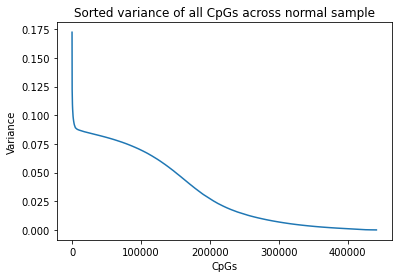

In [405]:
sorted_value=sorted(variance_allcpg,reverse=True)
x_label=range(0, len(variance_allcpg))
plt.figure()
plt.plot(x_label,sorted_value)
plt.xlabel('CpGs')
plt.ylabel('Variance')
plt.title('Sorted variance of all CpGs across normal sample')
plt.show()

In [400]:
feature_distribution=Counter(beta_value['V1'][mask])

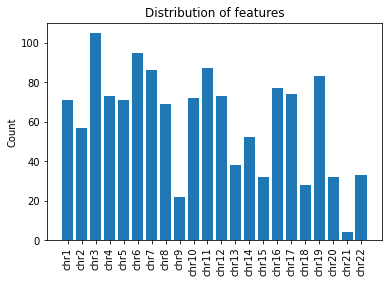

In [401]:
plt.bar(list(dict(feature_distribution).keys()),list(dict(feature_distribution).values()))
# Add labels to your graph
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Distribution of features")
plt.show()

In [402]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

In [403]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9791666666666666


ValueError: RandomForestClassifier should be a binary classifier

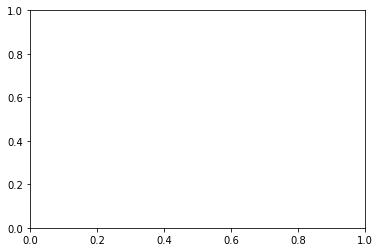

In [293]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

[34, 4, 6, 6, 12, 196, 196, 26]


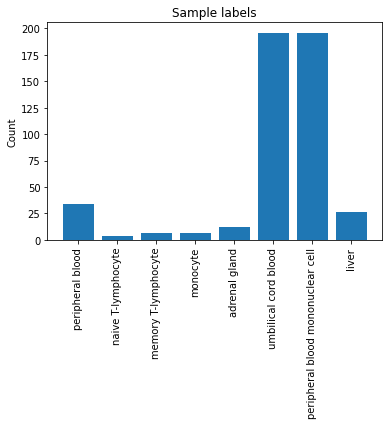

In [363]:
# Creating a bar plot
Y_distribution=Counter(Y)
plt.bar(list(dict(Y_distribution).keys()),list(dict(Y_distribution).values()))
print(list(dict(Y_distribution).values()))
# Add labels to your graph
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Sample labels")
plt.show()

In [70]:
disease_classify='cancer'
negative_sample_index=[[i for i in range(0,len(disease_term)) if ((disease_term[i]!=disease_classify) and (tissue_term[i]!='embryonic stem cell line' and tissue_term[i]!='MDA-MB-436 cell'))]]
positive_sample_index=[[i for i in range(0,len(disease_term)) if ((disease_term[i]==disease_classify) and (tissue_term[i]!='embryonic stem cell line' and tissue_term[i]!='MDA-MB-436 cell'))]]

[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 134, 135, 136, 137, 138, 139, 150, 151, 152, 153, 154, 155, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462

In [273]:
def get_disease_indicator_matrix(node,sample_index):
    id_node=disease_id_to_name[node]
    ancestor_nodes=[i for i in sample_index if ('normal' not in metadata_value['disease_name'][i] and disease_id_to_name[metadata_value['disease_name'][i]] in nx.descendants(disease_ontology_tree, id_node))]
    print(ancestor_nodes)
    positive_sample_index=[i for i in sample_index if 'normal' not in metadata_value['disease_name'][i] and disease_id_to_name[metadata_value['disease_name'][i]] not in nx.descendants(disease_ontology_tree, id_node) and (disease_id_to_name[metadata_value['disease_name'][i]] in nx.ancestors(disease_ontology_tree, id_node) or disease_id_to_name[metadata_value['disease_name'][i]]==id_node)]
    y_matrix=np.zeros(((len(metadata_value['disease_name'])), 1))
    y_matrix[positive_sample_index]=1
    samples_keep=list(set(sample_index)-set(ancestor_nodes))
    y_matrix_sample=y_matrix[samples_keep]
    return(y_matrix_sample,ancestor_nodes,positive_sample_index)

In [267]:
disease_ontology_tree=obonet.read_obo('./../annotation/doid.obo')
all_sample_index=range(0,len(metadata_value['disease_name']))

In [270]:
disease_id_to_name = { data.get('name'):id_ for id_, data in disease_ontology_tree.nodes(data=True)}

In [268]:
print(set(metadata_value['disease_name']))

{'normal-altered', 'T-cell lymphoblastic lymphoma', 'breast cancer-altered', 'neuroendocrine tumor', 'adjacent normal', 'hepatoblastoma', 'normal-treated', 'normal', 'rheumatoid arthritis', 'pineoblastoma', 'breast cancer', 'Williams syndrome', 'adrenocortical carcinoma', 'prostate cancer'}


In [274]:
[disease_matrix_sample,disease_ancestor_nodes,disease_positive_sample_index]=get_disease_indicator_matrix('rheumatoid arthritis',all_sample_index)

KeyError: 'breast cancer-altered'